In [59]:
import os
import numpy as np
import pandas as pd
import rasterio
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from scipy.ndimage import gaussian_filter
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from typing import Dict, List, Union
from tqdm import tqdm
from collections import defaultdict


In [23]:
RADAR_DIR = os.path.join("DATA_SV", "Precipitation", "Radar")
ERA5_BASE_DIR = os.path.join("DATA_SV", "ERA5")
ERA5_VARIABLES = [
    "CAPE", "CIN", "EWSS", "IE", "ISOR", "KX", "PEV", "R250", "R500", "R850",
    "SLHF", "SLOR", "SSHF", "TCLW", "TCW", "TCWV", "U250", "U850", "V250", "V850"
]

In [ ]:
# Hàm đọc file TIFF và chuyển thành DataFrame
def tiff_to_df(file_path):
    # Mở file .tif
    with rasterio.open(file_path) as src:
        # Đọc band đầu tiên
        band = src.read(1)
        # Tạo mảng các chỉ số (row, col) cho mỗi pixel
        rows, cols = np.indices(band.shape)
        
        # Chuyển chỉ số pixel thành tọa độ thực (lon, lat)
        # rasterio.transform.xy cho phép truyền vào mảng
        lons, lats = rasterio.transform.xy(src.transform, rows, cols, offset='center')
        
        # Đưa vào DataFrame
        df = pd.DataFrame({
            'longitude': np.array(lons).ravel(),
            'latitude':  np.array(lats).ravel(),
            'value':     band.ravel()
        })
        
        return df

In [ ]:
# Hàm lấy ngày từ tên file
def get_date_from_filename(filename):
    date_str = filename.split('_')[1][:8]  
    return date_str

In [28]:
# Hàm xử lý dữ liệu radar và xuất ra CSV
def process_radar_to_csv(radar_dir, years, months, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    for year in years:
        for month in months:
            month_dir = os.path.join(radar_dir, year, month)
            if not os.path.isdir(month_dir):
                continue
            
            for day in sorted(os.listdir(month_dir)):
                day_dir = os.path.join(month_dir, day)
                if not os.path.isdir(day_dir):
                    continue
                
                # Tập các file .tif trong ngày
                tiff_files = sorted(f for f in os.listdir(day_dir) if f.lower().endswith('.tif'))
                if not tiff_files:
                    continue
                
                # Đọc file đầu tiên để lấy grid lon/lat
                base_df = tiff_to_df(os.path.join(day_dir, tiff_files[0]))
                date = get_date_from_filename(tiff_files[0])
                
                # Bắt đầu DataFrame merged
                merged_df = base_df[['longitude', 'latitude']].copy()
                
                # Gộp giá trị từng giờ vào merged_df
                for fname in tqdm(tiff_files, desc=f"Processing {date}", leave=False):
                    fp = os.path.join(day_dir, fname)
                    df = tiff_to_df(fp)
                    time_str = fname.split('_')[1][8:14]  # 'HHMMSS'
                    merged_df[f'value_{time_str}'] = df['value']
                
                # Xuất CSV
                out_path = os.path.join(output_dir, f"Radar_{date}.csv")
                merged_df.to_csv(out_path, index=False)
                print(f"  → Saved: {out_path}")

if __name__ == "__main__":
    YEARS       = ['2019', '2020']
    MONTHS      = ['04', '10']
    OUTPUT_DIR  = os.path.join("CSV")
    
    process_radar_to_csv(RADAR_DIR, YEARS, MONTHS, OUTPUT_DIR)

  → Saved: CSV\Radar_20190401.csv


  → Saved: CSV\Radar_20190402.csv


  → Saved: CSV\Radar_20190403.csv


  → Saved: CSV\Radar_20190404.csv


  → Saved: CSV\Radar_20190405.csv


  → Saved: CSV\Radar_20190406.csv


  → Saved: CSV\Radar_20190407.csv


  → Saved: CSV\Radar_20190408.csv


  → Saved: CSV\Radar_20190409.csv


  → Saved: CSV\Radar_20190410.csv


  → Saved: CSV\Radar_20190411.csv


  → Saved: CSV\Radar_20190412.csv


  → Saved: CSV\Radar_20190413.csv


  → Saved: CSV\Radar_20190414.csv


  → Saved: CSV\Radar_20190415.csv


  → Saved: CSV\Radar_20190416.csv


  → Saved: CSV\Radar_20190417.csv


  → Saved: CSV\Radar_20190418.csv


  → Saved: CSV\Radar_20190419.csv


  → Saved: CSV\Radar_20190420.csv


  → Saved: CSV\Radar_20190421.csv


  → Saved: CSV\Radar_20190422.csv


  → Saved: CSV\Radar_20190423.csv


  → Saved: CSV\Radar_20190424.csv


  → Saved: CSV\Radar_20190425.csv


  → Saved: CSV\Radar_20190426.csv


  → Saved: CSV\Radar_20190427.csv


  → Saved: CSV\Radar_20190428.csv


  → Saved: CSV\Radar_20190429.csv


  → Saved: CSV\Radar_20190430.csv


  → Saved: CSV\Radar_20191001.csv


  → Saved: CSV\Radar_20191002.csv


  → Saved: CSV\Radar_20191003.csv


  → Saved: CSV\Radar_20191004.csv


  → Saved: CSV\Radar_20191008.csv


  → Saved: CSV\Radar_20191010.csv


  → Saved: CSV\Radar_20191011.csv


  → Saved: CSV\Radar_20191012.csv


  → Saved: CSV\Radar_20191013.csv


  → Saved: CSV\Radar_20191014.csv


  → Saved: CSV\Radar_20191015.csv

  → Saved: CSV\Radar_20191016.csv


  → Saved: CSV\Radar_20191017.csv


  → Saved: CSV\Radar_20191018.csv


  → Saved: CSV\Radar_20191019.csv


  → Saved: CSV\Radar_20191020.csv


  → Saved: CSV\Radar_20191022.csv


  → Saved: CSV\Radar_20191023.csv


  → Saved: CSV\Radar_20191024.csv


  → Saved: CSV\Radar_20191025.csv


  → Saved: CSV\Radar_20191026.csv


  → Saved: CSV\Radar_20191027.csv


  → Saved: CSV\Radar_20191028.csv


  → Saved: CSV\Radar_20191029.csv


  → Saved: CSV\Radar_20191030.csv


  → Saved: CSV\Radar_20191031.csv


  → Saved: CSV\Radar_20200401.csv


  → Saved: CSV\Radar_20200402.csv


  → Saved: CSV\Radar_20200403.csv


  → Saved: CSV\Radar_20200404.csv


  → Saved: CSV\Radar_20200405.csv


  → Saved: CSV\Radar_20200406.csv


  → Saved: CSV\Radar_20200407.csv


  → Saved: CSV\Radar_20200408.csv


  → Saved: CSV\Radar_20200409.csv


  → Saved: CSV\Radar_20200410.csv


  → Saved: CSV\Radar_20200411.csv


  → Saved: CSV\Radar_20200412.csv


  → Saved: CSV\Radar_20200413.csv


  → Saved: CSV\Radar_20200414.csv


  → Saved: CSV\Radar_20200415.csv


  → Saved: CSV\Radar_20200416.csv


  → Saved: CSV\Radar_20200417.csv


  → Saved: CSV\Radar_20200418.csv


  → Saved: CSV\Radar_20200419.csv


  → Saved: CSV\Radar_20200420.csv


  → Saved: CSV\Radar_20200421.csv


  → Saved: CSV\Radar_20200422.csv


  → Saved: CSV\Radar_20200423.csv


  → Saved: CSV\Radar_20201001.csv


  → Saved: CSV\Radar_20201002.csv


  → Saved: CSV\Radar_20201003.csv


  → Saved: CSV\Radar_20201004.csv


  → Saved: CSV\Radar_20201005.csv


  → Saved: CSV\Radar_20201006.csv


  → Saved: CSV\Radar_20201007.csv


  → Saved: CSV\Radar_20201008.csv


  → Saved: CSV\Radar_20201009.csv


  → Saved: CSV\Radar_20201010.csv


  → Saved: CSV\Radar_20201011.csv


  → Saved: CSV\Radar_20201012.csv


  → Saved: CSV\Radar_20201013.csv


  → Saved: CSV\Radar_20201014.csv


  → Saved: CSV\Radar_20201015.csv


  → Saved: CSV\Radar_20201016.csv


  → Saved: CSV\Radar_20201017.csv


  → Saved: CSV\Radar_20201018.csv


  → Saved: CSV\Radar_20201019.csv


  → Saved: CSV\Radar_20201020.csv


  → Saved: CSV\Radar_20201021.csv


  → Saved: CSV\Radar_20201022.csv


  → Saved: CSV\Radar_20201023.csv


  → Saved: CSV\Radar_20201024.csv


  → Saved: CSV\Radar_20201025.csv


  → Saved: CSV\Radar_20201026.csv


  → Saved: CSV\Radar_20201027.csv


  → Saved: CSV\Radar_20201028.csv


  → Saved: CSV\Radar_20201029.csv


  → Saved: CSV\Radar_20201030.csv


  → Saved: CSV\Radar_20201031.csv


In [31]:
def read_radar_tiff(file_path):
    """
    Đọc dữ liệu radar từ file TIFF.
    Trả về 1D numpy array (n_pixels,) hoặc None nếu file không tồn tại.
    """
    if not os.path.isfile(file_path):
        return None
    with rasterio.open(file_path) as src:
        data = src.read(1)  # chỉ đọc band 1
    return data.ravel()

def read_radar_csv(file_path):
    """
    Đọc dữ liệu radar từ file CSV đã gộp.
    Trả về 2D numpy array với shape (n_pixels, n_times)
    hoặc None nếu file không tồn tại.
    """
    if not os.path.isfile(file_path):
        return None
    df = pd.read_csv(file_path)
    # Chọn các cột value_HHMMSS
    value_cols = [c for c in df.columns if c.startswith('value_')]
    return df[value_cols].to_numpy()

In [51]:
file_list = [os.path.splitext(f)[0] 
             for f in os.listdir(OUTPUT_DIR) ]
file_list.sort()

file_list

['Radar_20190401',
 'Radar_20190402',
 'Radar_20190403',
 'Radar_20190404',
 'Radar_20190405',
 'Radar_20190406',
 'Radar_20190407',
 'Radar_20190408',
 'Radar_20190409',
 'Radar_20190410',
 'Radar_20190411',
 'Radar_20190412',
 'Radar_20190413',
 'Radar_20190414',
 'Radar_20190415',
 'Radar_20190416',
 'Radar_20190417',
 'Radar_20190418',
 'Radar_20190419',
 'Radar_20190420',
 'Radar_20190421',
 'Radar_20190422',
 'Radar_20190423',
 'Radar_20190424',
 'Radar_20190425',
 'Radar_20190426',
 'Radar_20190427',
 'Radar_20190428',
 'Radar_20190429',
 'Radar_20190430',
 'Radar_20191001',
 'Radar_20191002',
 'Radar_20191003',
 'Radar_20191004',
 'Radar_20191008',
 'Radar_20191010',
 'Radar_20191011',
 'Radar_20191012',
 'Radar_20191013',
 'Radar_20191014',
 'Radar_20191015',
 'Radar_20191016',
 'Radar_20191017',
 'Radar_20191018',
 'Radar_20191019',
 'Radar_20191020',
 'Radar_20191022',
 'Radar_20191023',
 'Radar_20191024',
 'Radar_20191025',
 'Radar_20191026',
 'Radar_20191027',
 'Radar_2019

Bảng tổng hợp số lượng giá trị theo file:
                   file    -inf       0  Other
0    Radar_20190401.csv  153624  367190  19186
1    Radar_20190402.csv  153624  383344   3032
2    Radar_20190403.csv  153624  380443   5933
3    Radar_20190404.csv  153624  383173   3203
4    Radar_20190405.csv  153624  386376      0
..                  ...     ...     ...    ...
105  Radar_20201027.csv   96015  235505   5980
106  Radar_20201028.csv  140822  255777  98401
107  Radar_20201029.csv  147223  290991  79286
108  Radar_20201030.csv  153624  343037  43339
109  Radar_20201031.csv  153624  378299   8077

[110 rows x 4 columns]


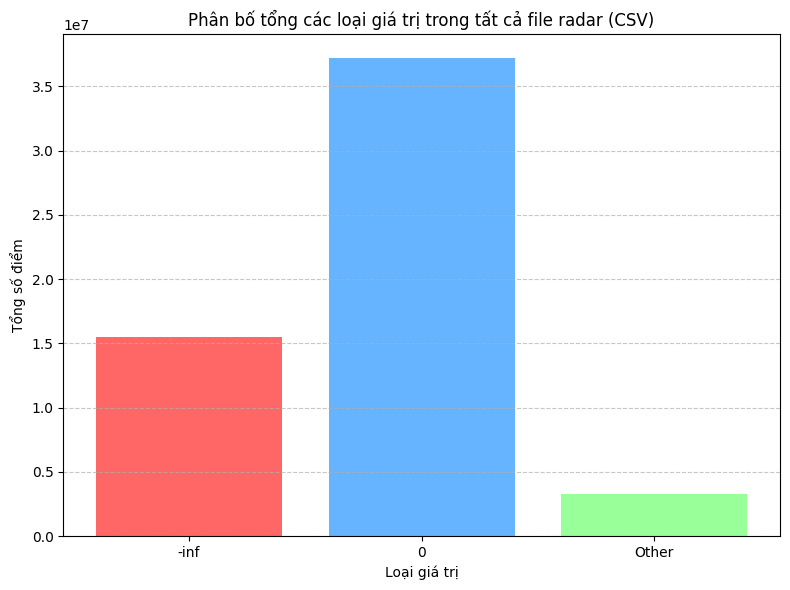

In [ ]:
# Thư mục chứa các file CSV được xuất
CSV_DIR = os.path.join("CSV")

# Tìm tất cả các file Radar_YYYYMMDD.csv
csv_paths = sorted(glob.glob(os.path.join(CSV_DIR, "Radar_*.csv")))

# Thu thập thống kê
records = []
for fp in csv_paths:
    df = pd.read_csv(fp)
    value_cols = [c for c in df.columns if c.startswith("value_")]
    arr = df[value_cols].to_numpy().ravel()
    
    n_inf   = np.isneginf(arr).sum()
    n_zero  = (arr == 0).sum()
    n_other = arr.size - n_inf - n_zero
    
    records.append({
        "file":  os.path.basename(fp),
        "-inf":  int(n_inf),
        "0":     int(n_zero),
        "Other": int(n_other)
    })

# Xây dựng DataFrame tổng hợp
summary_df = pd.DataFrame(records)
print("Bảng tổng hợp số lượng giá trị theo file:")
print(summary_df)

# Tính tổng các loại giá trị qua tất cả file
totals = summary_df[["-inf", "0", "Other"]].sum()

# Vẽ bar chart 
labels = totals.index.tolist()
counts = totals.values
colors = ['#ff6666', '#66b3ff', '#99ff99']  # bạn có thể tùy chỉnh danh sách màu

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title("Phân bố tổng các loại giá trị trong tất cả file radar (CSV)")
plt.xlabel("Loại giá trị")
plt.ylabel("Tổng số điểm")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()









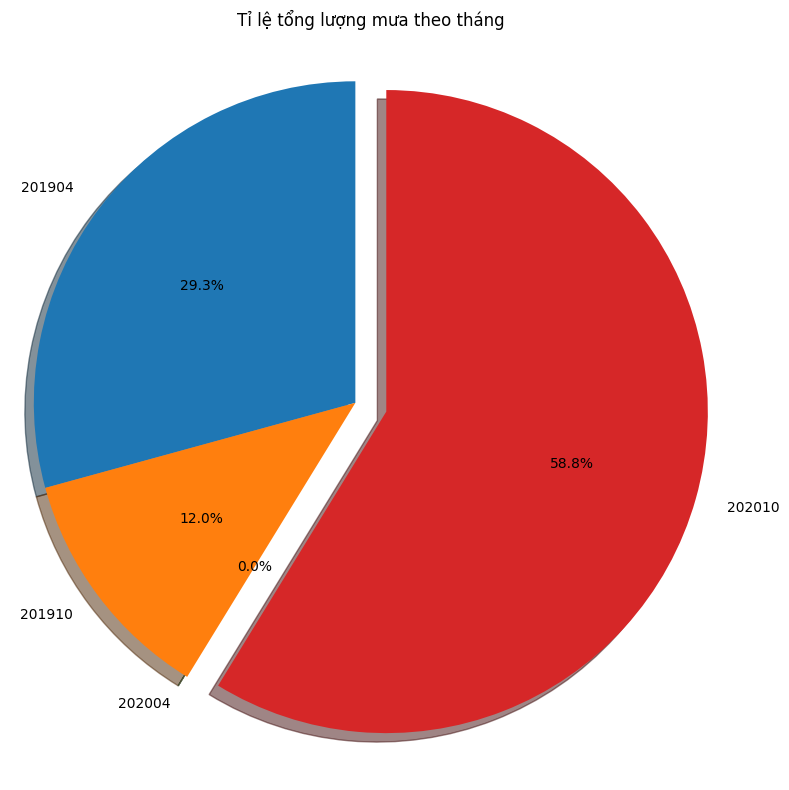

Số ngày có dữ liệu theo tháng:
  201904: 30 ngày
  201910: 26 ngày
  202004: 23 ngày
  202010: 31 ngày


In [ ]:
# Hàm chuyển dBZ sang mm/h
def dBZ_to_rainfall(dBZ, a=200, b=1.6):
    dBZ = np.where(np.isinf(dBZ) | np.isnan(dBZ), 0, dBZ)
    Z = 10 ** (dBZ / 10)
    return (Z / a) ** (1 / b)

# Thư mục chứa CSV đã xuất
csv_dir = "CSV"  

# Khởi tạo counters
monthly_rainfall = defaultdict(float)
monthly_days     = defaultdict(int)

# Duyệt qua danh sách file_list (định nghĩa từ trước)
for file_name in file_list:
    fp = os.path.join(csv_dir, f"{file_name}.csv")
    if not os.path.isfile(fp):
        continue
    
    df = pd.read_csv(fp)
    value_cols = [c for c in df.columns if c.startswith('value_')]
    
    # Chuyển toàn bộ ma trận dBZ sang mm/h
    rain_vals = dBZ_to_rainfall(df[value_cols].values)
    # Tổng mưa trong ngày = trung bình mọi pixel & giờ × số giờ
    daily_total = rain_vals.mean() * len(value_cols)
    
    month_key = file_name[6:12]  # 'YYYYMM'
    monthly_rainfall[month_key] += daily_total
    monthly_days[month_key]     += 1

# Tạo danh sách tháng và tổng mưa
months          = sorted(monthly_rainfall.keys())
totals          = np.array([monthly_rainfall[m] for m in months], dtype=float)
# Loại NaN và -inf
totals          = np.nan_to_num(totals, nan=0.0, neginf=0.0)
# Tạo explode để làm nổi bật tháng có mưa lớn nhất
explode         = [0.1 if t == totals.max() else 0 for t in totals]

# Vẽ pie chart
plt.figure(figsize=(8,8))
plt.pie(
    totals,
    labels=months,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)
plt.title("Tỉ lệ tổng lượng mưa theo tháng")
plt.axis('equal')
plt.tight_layout()
plt.show()

# In số ngày có dữ liệu mỗi tháng
print("Số ngày có dữ liệu theo tháng:")
for m in months:
    print(f"  {m}: {monthly_days[m]} ngày")

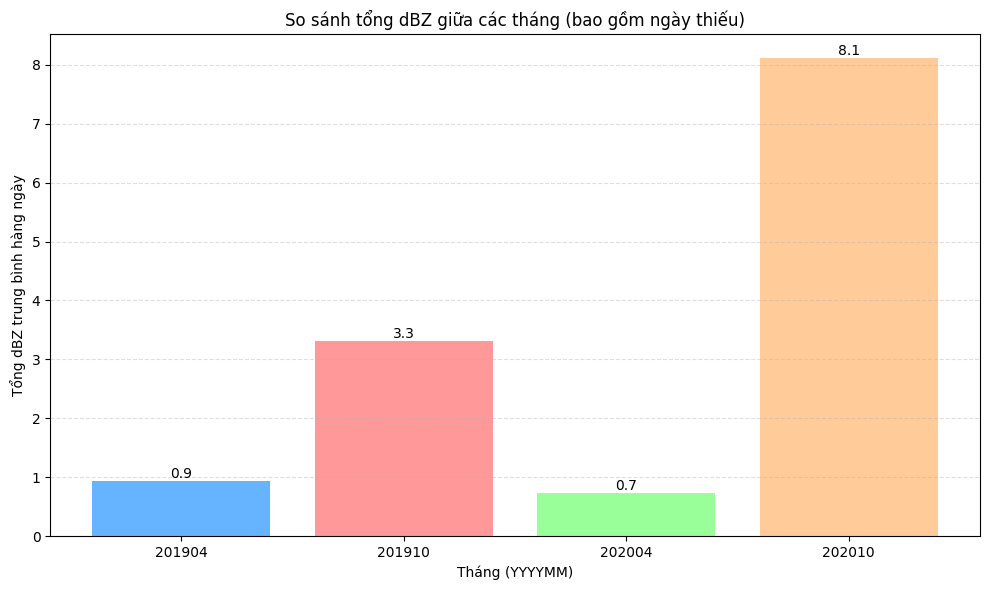

Số ngày có dữ liệu/tổng ngày mỗi tháng:
  201904: 30/30 ngày
  201910: 26/31 ngày
  202004: 23/30 ngày
  202010: 31/31 ngày


In [65]:
# Khởi tạo counters cho dBZ
monthly_dbz   = defaultdict(float)
monthly_days  = defaultdict(int)

# Duyệt qua danh sách file_list (định nghĩa từ trước)
for file_name in file_list:
    fp = os.path.join(csv_dir, f"{file_name}.csv")
    if not os.path.isfile(fp):
        continue
    
    df = pd.read_csv(fp)
    value_cols = [c for c in df.columns if c.startswith('value_')]
    
    # Đọc mảng dBZ, thay -inf/NaN → 0
    arr = df[value_cols].to_numpy().ravel()
    arr = np.where(np.isinf(arr) | np.isnan(arr), 0, arr)
    
    # Trung bình dBZ hàng ngày
    daily_mean_dbz = arr.mean()
    
    # Gộp theo tháng YYYYMM
    month_key = file_name[6:12]
    monthly_dbz[month_key]  += daily_mean_dbz
    monthly_days[month_key] += 1

# Tạo danh sách tháng và mảng tổng dBZ
months = sorted(monthly_dbz.keys())
dbz_totals = np.array([monthly_dbz[m] for m in months], dtype=float)
dbz_totals = np.nan_to_num(dbz_totals, nan=0.0, neginf=0.0)

# Vẽ bar chart
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']  # tùy chỉnh nếu cần
plt.figure(figsize=(10, 6))
bars = plt.bar(months, dbz_totals, color=colors[:len(months)])
plt.xlabel("Tháng (YYYYMM)")
plt.ylabel("Tổng dBZ trung bình hàng ngày")
plt.title("So sánh tổng dBZ giữa các tháng (bao gồm ngày thiếu)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Thêm nhãn giá trị lên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# In số ngày có dữ liệu và tổng ngày trong mỗi tháng
print("Số ngày có dữ liệu/tổng ngày mỗi tháng:")
for m in months:
    days_in_month = pd.Timestamp(f"{m[:4]}-{m[4:]}-01").days_in_month
    print(f"  {m}: {monthly_days[m]}/{days_in_month} ngày")

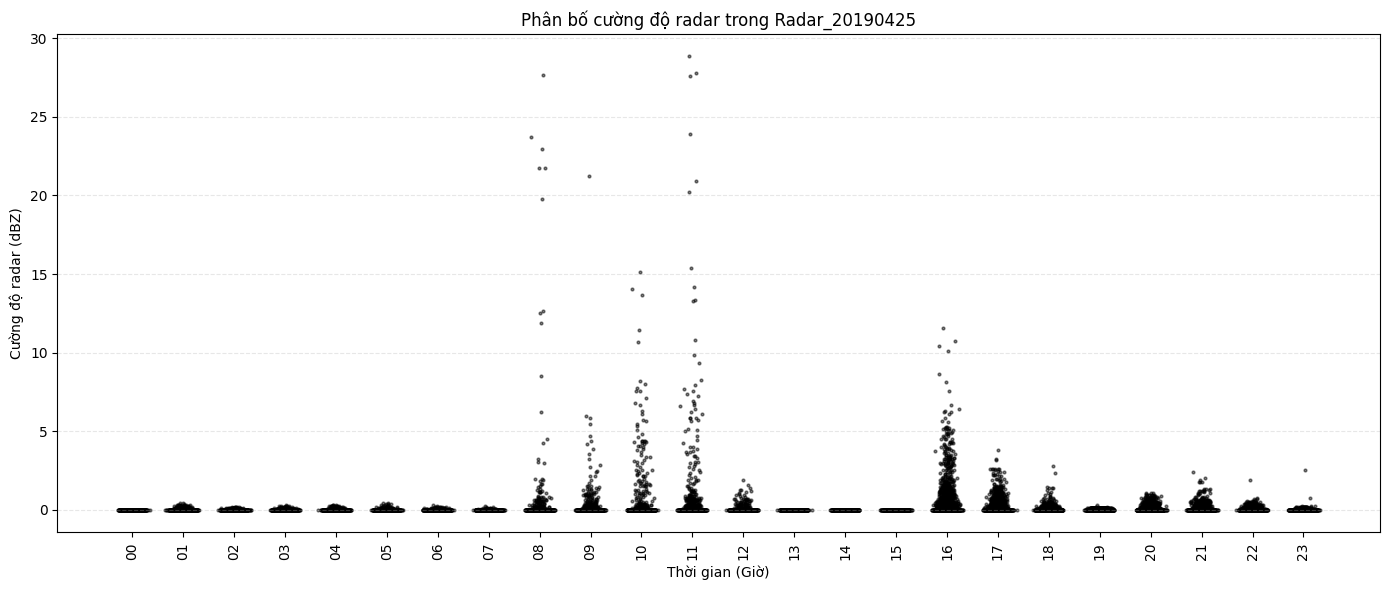

In [ ]:

csv_dir = "CSV"              # thư mục chứa các file Radar_YYYYMMDD.csv
date    = "20190425"         # chọn ngày bất kỳ
fp      = os.path.join(csv_dir, f"Radar_{date}.csv")

# ----- Đọc dữ liệu -----
df = pd.read_csv(fp)
value_cols = [c for c in df.columns if c.startswith("value_")]  # ['value_000000', 'value_010000', ...]

# ----- Vẽ scatter per-hour -----
plt.figure(figsize=(14, 6))
for i, col in enumerate(value_cols):
    # lấy tất cả giá trị, loại bỏ inf/NaN
    y = df[col].replace([np.inf, -np.inf], np.nan).dropna().values
    # tạo jitter nhẹ trên trục x để các điểm không chồng lên nhau
    x = np.random.normal(loc=i, scale=0.08, size=len(y))
    plt.scatter(x, y, s=4, alpha=0.5, color="k")

# ----- Format trục -----
# đánh nhãn mỗi giờ (00, 01, ..., 23)
hours = [col.split("_")[1][:2] for col in value_cols]
plt.xticks(np.arange(len(hours)), hours, rotation=90)
plt.xlabel("Thời gian (Giờ)")
plt.ylabel("Cường độ radar (dBZ)")
plt.title(f"Phân bố cường độ radar trong Radar_{date}")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()



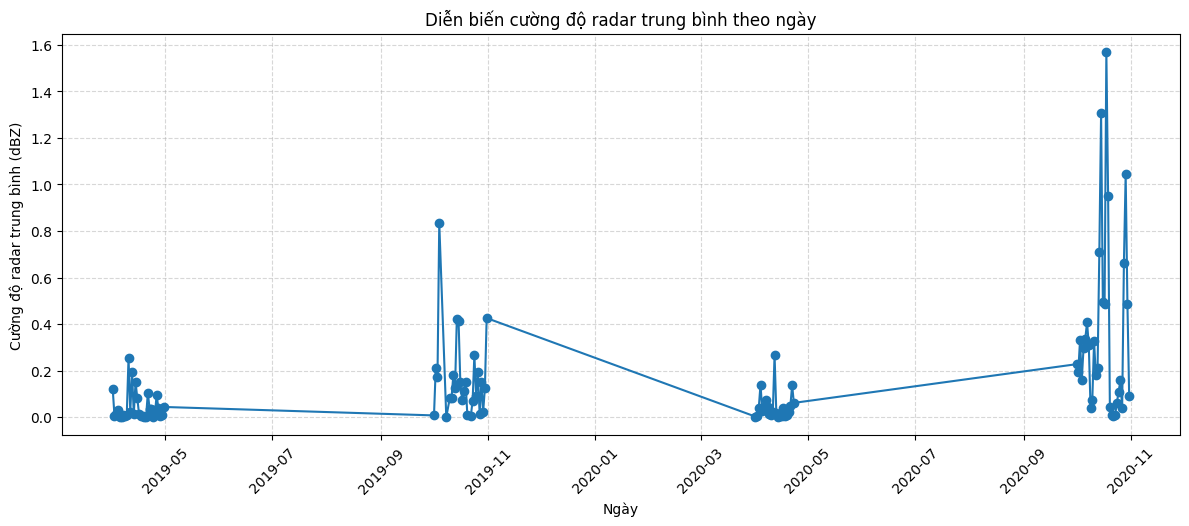

In [ ]:
csv_dir = "CSV" 

csv_paths = sorted(glob.glob(os.path.join(csv_dir, "Radar_*.csv")))

# Chuẩn bị list lưu ngày và cường độ trung bình
dates = []
daily_means = []

for fp in csv_paths:
    # Lấy chuỗi ngày 'YYYYMMDD' từ tên file
    fname = os.path.basename(fp)
    date_str = fname.split('_')[1].split('.')[0]
    
    # Đọc dữ liệu
    df = pd.read_csv(fp)
    value_cols = [c for c in df.columns if c.startswith('value_')]
    # Lấy toàn bộ giá trị, loại bỏ inf/NaN
    arr = df[value_cols].to_numpy().ravel()
    arr = arr[~np.isnan(arr)]
    arr = arr[~np.isinf(arr)]
    if arr.size == 0:
        continue
    
    # Tính mean
    mean_dbz = arr.mean()
    dates.append(pd.to_datetime(date_str, format="%Y%m%d"))
    daily_means.append(mean_dbz)

# Nếu không có ngày nào, thông báo và dừng
if not dates:
    print("Không tìm thấy dữ liệu để tính trung bình.")
else:
    # Tạo DataFrame để dễ plot
    df_mean = pd.DataFrame({
        "Date": dates,
        "Mean_dBZ": daily_means
    }).sort_values("Date")
    
    # Vẽ line plot
    plt.figure(figsize=(12, 5))
    plt.plot(df_mean["Date"], df_mean["Mean_dBZ"], marker='o', linestyle='-')
    plt.xlabel("Ngày")
    plt.ylabel("Cường độ radar trung bình (dBZ)")
    plt.title("Diễn biến cường độ radar trung bình theo ngày")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()










ERA5

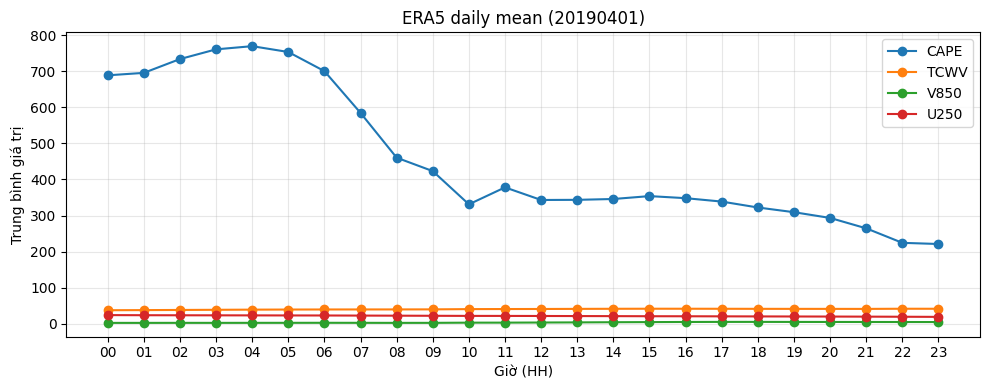

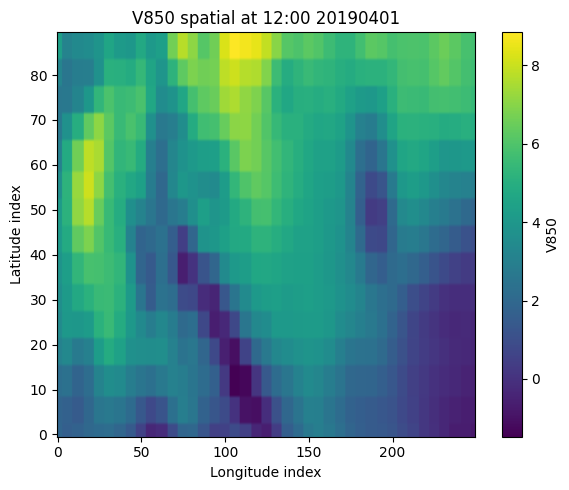

In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

# Hàm chuyển TIFF → DataFrame 
def tiff_to_df(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)
        transform = src.transform
        rows, cols = data.shape
        x, y = np.meshgrid(np.arange(cols), np.arange(rows))
        lon, lat = rasterio.transform.xy(transform, y, x)
        return pd.DataFrame({
            'longitude': np.array(lon).ravel(),
            'latitude':  np.array(lat).ravel(),
            'value':     data.ravel()
        })

# --- 1) Load toàn bộ ERA5 cho một ngày ---
date = "20190401"
ERA5_DIR = os.path.join("DATA_SV", "ERA5")

era5_data = {}
for var in ERA5_VARIABLES:
    era5_data[var] = {}
    for hour in range(24):
        time_str = f"{hour:02d}0000"
        fp = os.path.join(
            ERA5_DIR, var,
            date[:4], date[4:6], date[6:8],
            f"{var}_{date}{time_str}.tif"
        )
        if os.path.isfile(fp):
            era5_data[var][time_str] = tiff_to_df(fp)
        else:
            # nếu thiếu, vẫn khởi tạo DataFrame rỗng
            era5_data[var][time_str] = pd.DataFrame(columns=['longitude','latitude','value'])

# --- 2) Time‐series: biến trung bình theo giờ trong ngày ---
vars_to_plot = ["CAPE", "TCWV", "V850", "U250"]
ts_index = sorted(era5_data[vars_to_plot[0]].keys())

df_ts = pd.DataFrame(
    {var: [era5_data[var][h]['value'].mean() for h in ts_index]
     for var in vars_to_plot},
    index=[h[:2] for h in ts_index]  # chỉ lấy 'HH'
)

plt.figure(figsize=(10,4))
for var in vars_to_plot:
    plt.plot(df_ts.index, df_ts[var], marker='o', label=var)
plt.xlabel("Giờ (HH)")
plt.ylabel("Trung bình giá trị")
plt.title(f"ERA5 daily mean ({date})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 4) Bản đồ không gian (heatmap) cho một biến và giờ ---
var, hour = "V850", "120000"
df_map = era5_data[var][hour]
if not df_map.empty:
    # Pivot để tạo ma trận
    grid = df_map.pivot(index='latitude', columns='longitude', values='value')
    plt.figure(figsize=(6,5))
    plt.imshow(grid.values, origin='lower', aspect='auto')
    plt.colorbar(label=var)
    plt.title(f"{var} spatial at {hour[:2]}:00 {date}")
    plt.xlabel("Longitude index")
    plt.ylabel("Latitude index")
    plt.tight_layout()
    plt.show()
else:
    print(f"No data for {var} at {hour} on {date}")


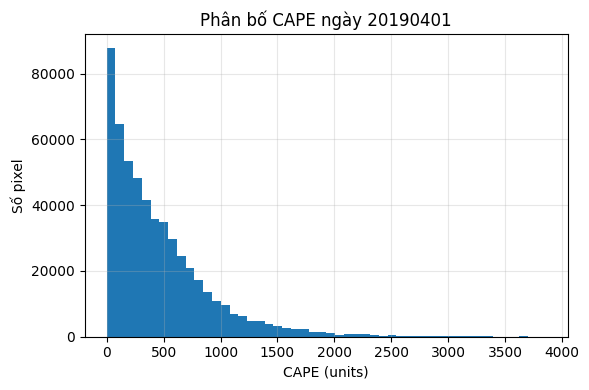

In [80]:
# --- 3) Histogram phân bố giá trị trong ngày cho một biến ---
var = "CAPE"
all_values = pd.concat([era5_data[var][h]['value'] for h in ts_index])
all_values = all_values.replace([-np.inf, np.inf], np.nan).dropna()

plt.figure(figsize=(6,4))
plt.hist(all_values, bins=50)
plt.xlabel("CAPE (units)")
plt.ylabel("Số pixel")
plt.title(f"Phân bố CAPE ngày {date}")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

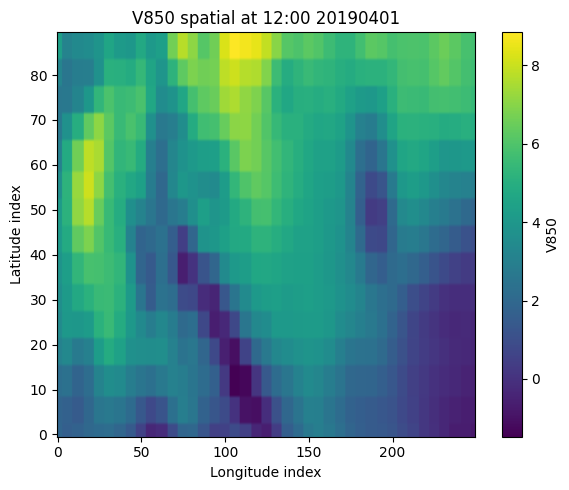

In [81]:
# --- 4) Bản đồ không gian (heatmap) cho một biến và giờ ---
var, hour = "V850", "120000"
df_map = era5_data[var][hour]
if not df_map.empty:
    # Pivot để tạo ma trận
    grid = df_map.pivot(index='latitude', columns='longitude', values='value')
    plt.figure(figsize=(6,5))
    plt.imshow(grid.values, origin='lower', aspect='auto')
    plt.colorbar(label=var)
    plt.title(f"{var} spatial at {hour[:2]}:00 {date}")
    plt.xlabel("Longitude index")
    plt.ylabel("Latitude index")
    plt.tight_layout()
    plt.show()
else:
    print(f"No data for {var} at {hour} on {date}")

In [83]:
# --- Gộp toàn bộ DataFrame era5_data cho một ngày bất kỳ ---
merged_era5_df = None

for var in ERA5_VARIABLES:
    for time_str, df in era5_data[var].items():
        # Đổi tên cột 'value' thành '<VAR>_<HHMMSS>'
        col_name = f"{var}_{time_str}"
        df_col = df[['longitude', 'latitude', 'value']].rename(columns={'value': col_name})
        
        if merged_era5_df is None:
            # Lần đầu tiên, khởi tạo merged_era5_df
            merged_era5_df = df_col.copy()
        else:
            # Merge lần lượt, giữ tất cả điểm (outer join)
            merged_era5_df = merged_era5_df.merge(
                df_col,
                on=['longitude', 'latitude'],
                how='outer'
            )

# Kết quả
print("Dữ liệu ERA5 gộp cho ngày", date, ":")
print(merged_era5_df.head())

# Tùy chọn: lưu ra CSV để dễ xem
merged_era5_df.to_csv(f"ERA5_merged_{date}.csv", index=False)


Dữ liệu ERA5 gộp cho ngày 20190401 :
   longitude  latitude  CAPE_000000  CAPE_010000  CAPE_020000  CAPE_030000  \
0     101.02     17.52      895.000      818.875       962.00       1329.5   
1     101.02     17.56      895.000      818.875       962.00       1329.5   
2     101.02     17.60      895.000      818.875       962.00       1329.5   
3     101.02     17.64      778.125      690.625       581.75        844.0   
4     101.02     17.68      778.125      690.625       581.75        844.0   

   CAPE_040000  CAPE_050000  CAPE_060000  CAPE_070000  ...  V850_140000  \
0        986.5      846.875     1138.625       889.75  ...     3.316650   
1        986.5      846.875     1138.625       889.75  ...     3.316650   
2        986.5      846.875     1138.625       889.75  ...     3.316650   
3        751.0      746.875      801.000       868.50  ...     3.459229   
4        751.0      746.875      801.000       868.50  ...     3.459229   

   V850_150000  V850_160000  V850_170000  V

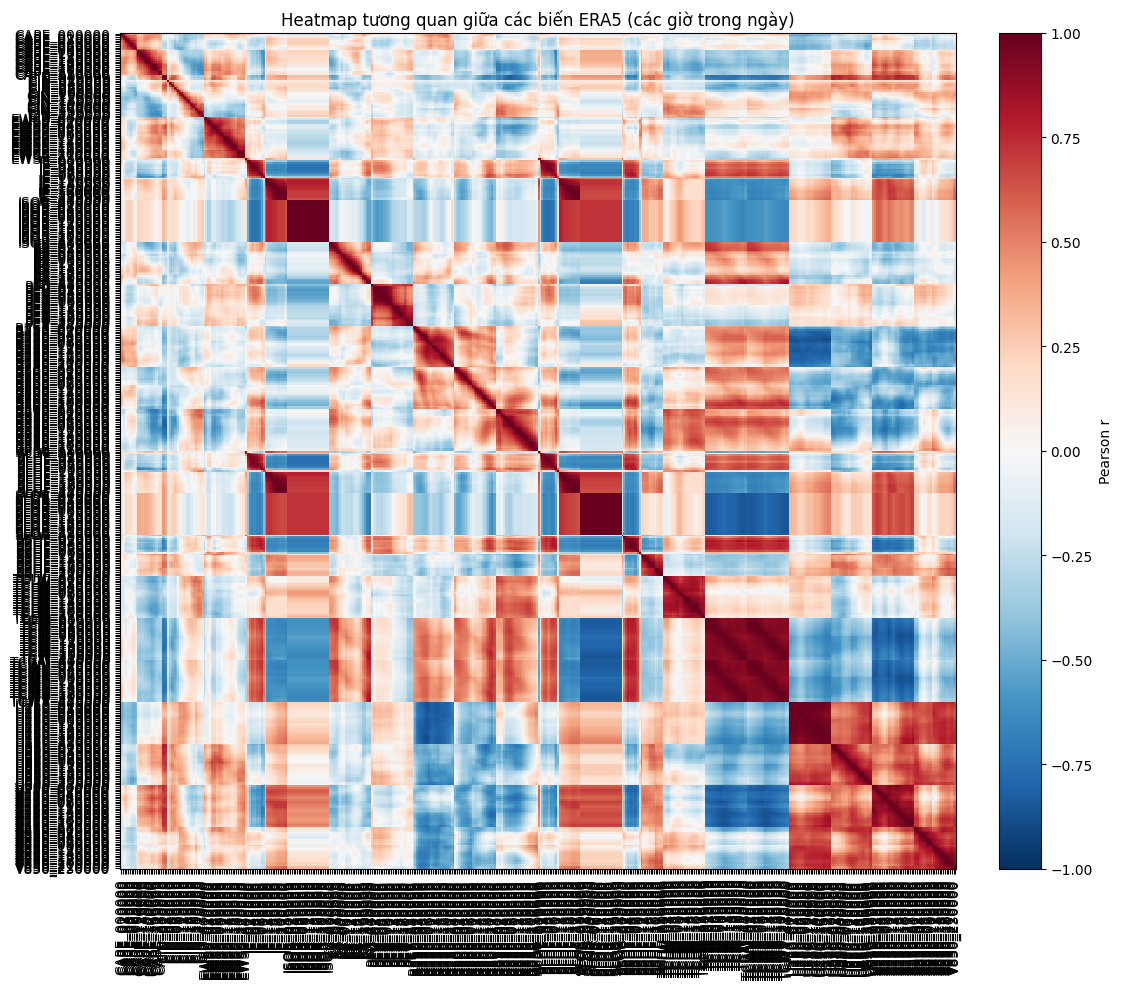

In [84]:
# 1) Tính ma trận tương quan giữa các biến (loại bỏ longitude, latitude)
corr_df = merged_era5_df.drop(columns=['longitude', 'latitude']).corr()

# 2) Vẽ heatmap bằng matplotlib
plt.figure(figsize=(12, 10))
# Hiển thị ma trận tương quan
im = plt.imshow(corr_df, cmap='RdBu_r', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Pearson r')

# Đặt nhãn trục
labels = corr_df.columns
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Heatmap tương quan giữa các biến ERA5 (các giờ trong ngày)")
plt.tight_layout()
plt.show()